In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
data.shape

(32560, 15)

given data contains 32560 rows and 15 feturees including target variable

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


dataset conatins 6 numrcil variable and 9 categorical varaibles with no null values

In [5]:
data.describe().round(2)

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.00,32560.00,32560.00,32560.00,32560.00,32560.00
mean,38.58,189781.81,10.08,1077.62,87.31,40.44
std,13.64,105549.76,2.57,7385.40,402.97,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117831.50,9.00,0.00,0.00,40.00
50%,37.00,178363.00,10.00,0.00,0.00,40.00
75%,48.00,237054.50,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [6]:
data.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

Observations:
    1. minimum age in given data set is 17 and the maximum is 90. this feture is skewed to the right and STD is high
    2. fnlwgt feaatures minimum is 12285 and the maximum is 1484705. this feturee is skewed and the deviation is too high
    3. education_num is a categorical variable, which is encoded already
    4. captital gain is skewwed to the right highly
    5. capital loss is skewwed to the right highly
    6. Hours per week is skewed to the right

# EXPLORATORY DATA ANALYSIS

# Univariate Analysis

In [7]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

<AxesSubplot:ylabel='Frequency'>

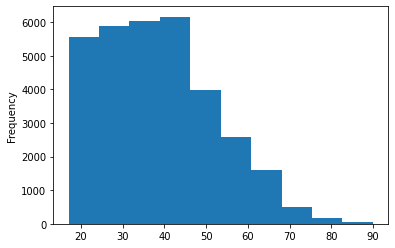

In [8]:
data.Age.plot.hist()

Age feature is skewwed to the right and maxim number of employees falls between range of 18 to 60

<AxesSubplot:xlabel='Workclass', ylabel='count'>

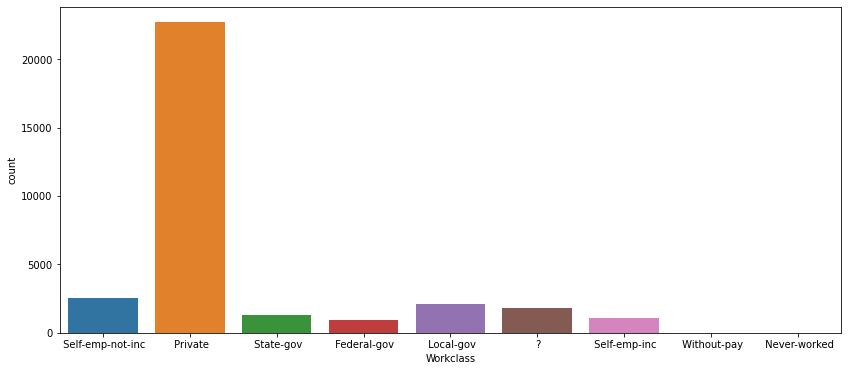

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['Workclass'])

In [10]:
data[data['Workclass'].str.strip()=='?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


there are 1836 data's contains missing values in Workclass feature

many people in the given data set are from private wor group and there are few persons falls in the group of withoutpay and nver worked category.           
Also there is a category "?" which should be null., we will handle it in featuree engineering

<AxesSubplot:ylabel='Frequency'>

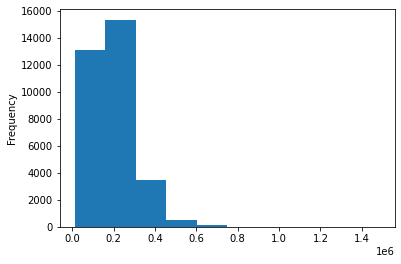

In [11]:
data.Fnlwgt.plot.hist()

fnlwgt feature is skewed to the right, we will  fix them in feature engineering, most of the data daata falls between range of 0.0 to 0.4le6

<AxesSubplot:xlabel='Education', ylabel='count'>

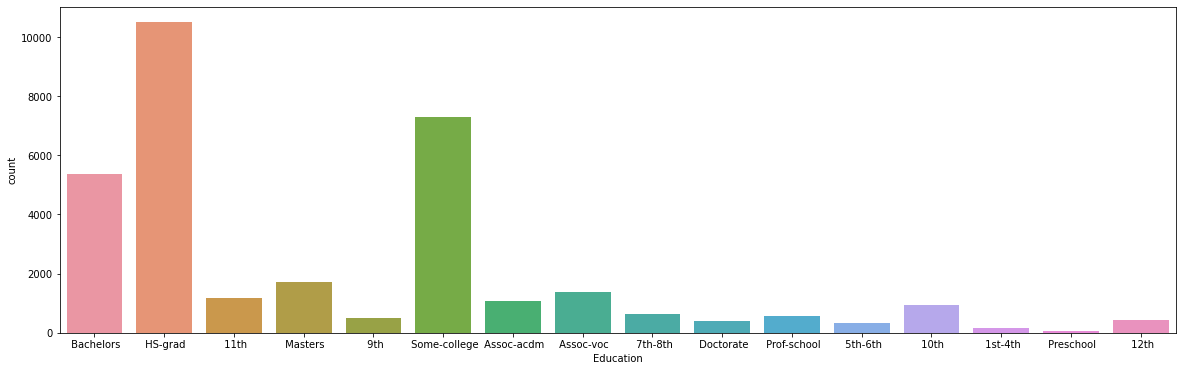

In [12]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Education'])

In [13]:
data.Education.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

most of the data from total poulation falls under education category HS-grad(10501) and the least is preschool(51)

<AxesSubplot:xlabel='Education_num', ylabel='count'>

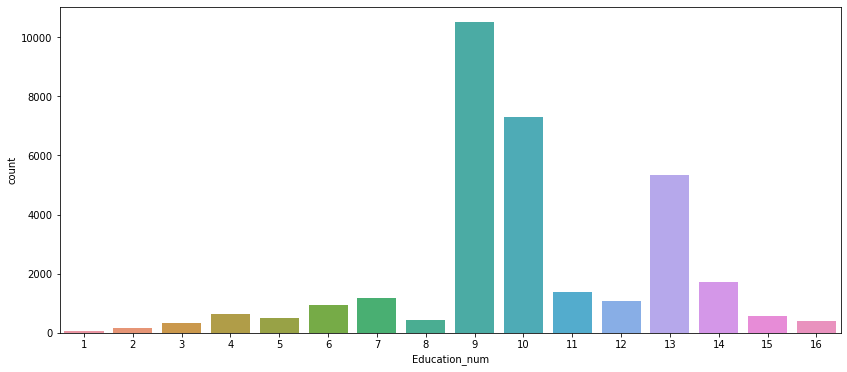

In [14]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['Education_num'])

In [15]:
data.Education_num.value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

Education number is encoded feature of feature Education, hence education feature can be dropped in feaature engineering section

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

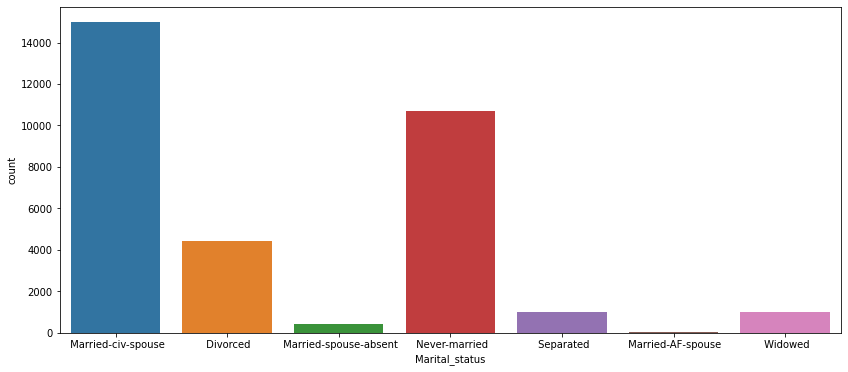

In [16]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['Marital_status'])

In [17]:
data.Marital_status.value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

highest data from the dataset falls in category "Married-civ-spouse" where as the least is "Married-AF-spouse" as shown above

<AxesSubplot:xlabel='Occupation', ylabel='count'>

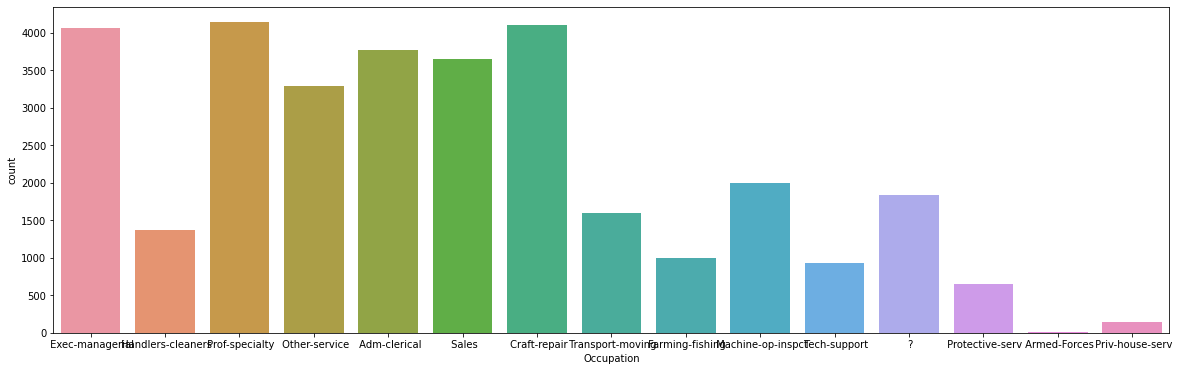

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x=data['Occupation'])

In [19]:
data.Occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

highest numbr of data falls under Occupation category "Prof-Speciality , Craft-Repair, Exec-Manager, adm-Clerical and Sales" and the least is "Armed force" as shown above.                
There are 1843  missing values denoted with "?" in the data set, we will replace them with mode in featur engineering

<AxesSubplot:xlabel='Relationship', ylabel='count'>

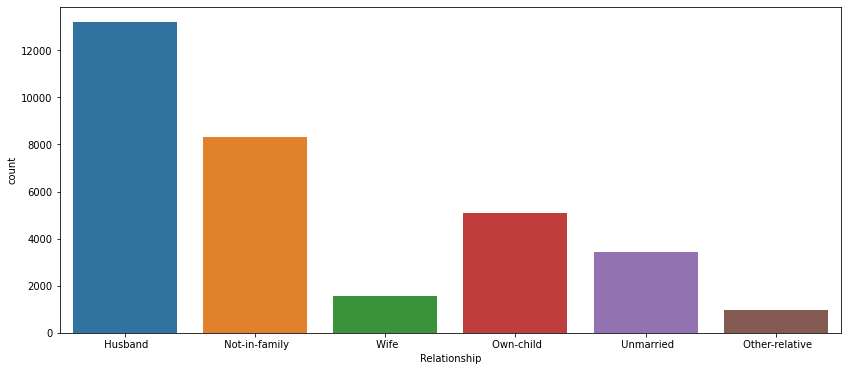

In [20]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['Relationship'])

In [21]:
data.Relationship.value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

majority of the data collected are from males(husband) and the least is Other-Relatives

<AxesSubplot:xlabel='Race', ylabel='count'>

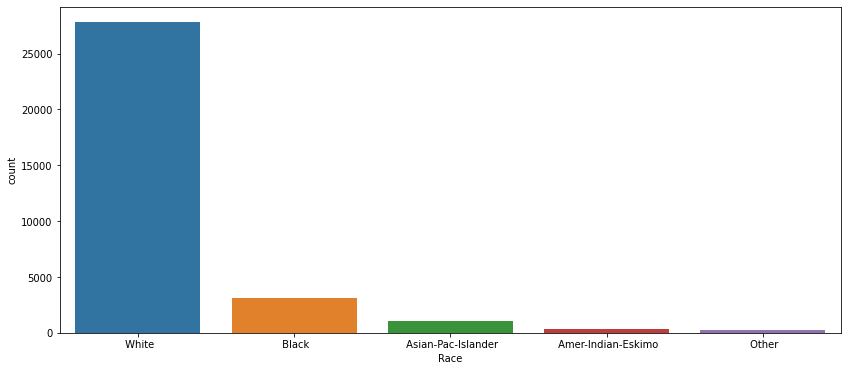

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['Race'])

In [23]:
data.Race.value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

Majority of the data collected are from White race people and the leaset us Amer-Indian-Eskimo and other category

 Male      21789
 Female    10771
Name: Sex, dtype: int64


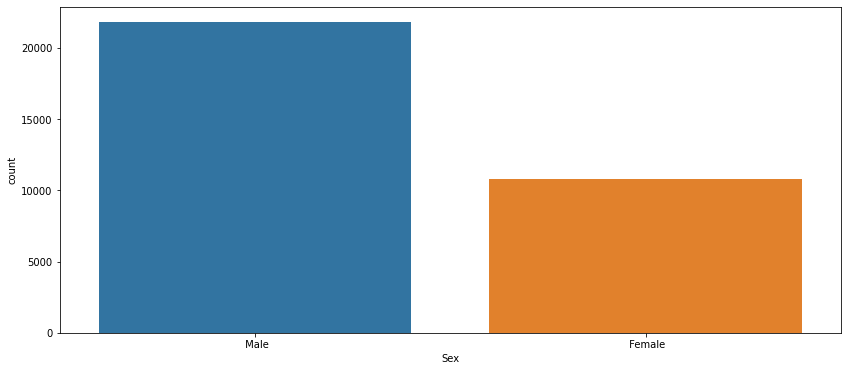

In [24]:
plt.figure(figsize=(14,6))
sns.countplot(x=data['Sex'])
print(data.Sex.value_counts())

there are 21789 males and 10771 females data in the given dataset 

<Figure size 1008x432 with 0 Axes>

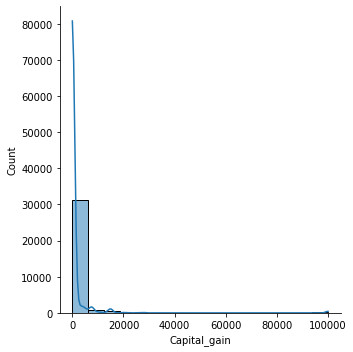

In [25]:
plt.figure(figsize=(14,6))
sns.displot(x=data['Capital_gain'],kde=True)

Capital_gain is skewed to the right and there are outliers, we will fix outliers in the feature engineering section

<Figure size 1008x432 with 0 Axes>

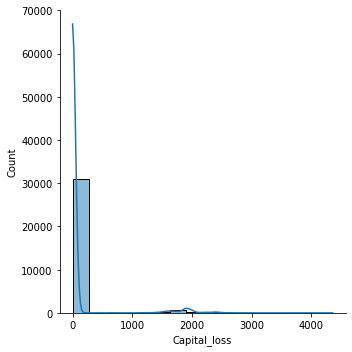

In [26]:
plt.figure(figsize=(14,6))
sns.displot(x=data['Capital_loss'],kde=True)

Capital loss is skeed to the right and there are outliers which will be fixed in feture engineering section

<AxesSubplot:ylabel='Density'>

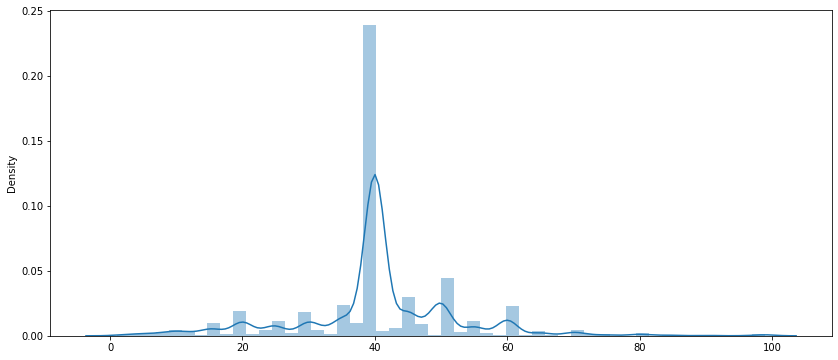

In [27]:
plt.figure(figsize=(14,6))
sns.distplot(x=data['Hours_per_week'])

Hours_per_week is normally distributed but the deviation is high due to outliers which we will fix in feature engineering section

<AxesSubplot:xlabel='Native_country', ylabel='count'>

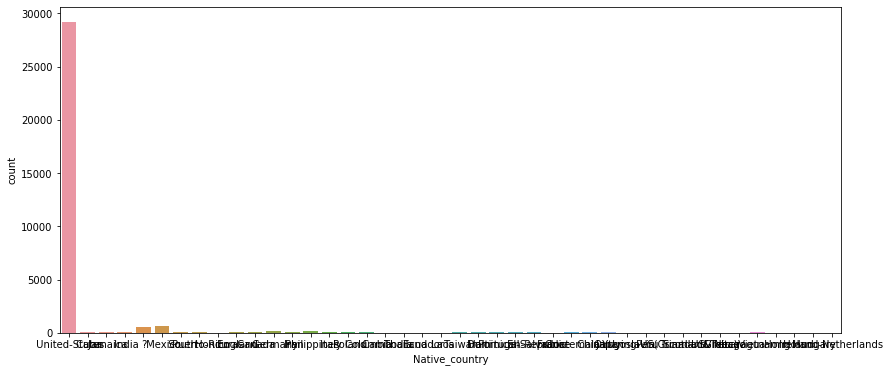

In [28]:
plt.figure(figsize=(14,6))
sns.countplot(data['Native_country'],orient='h')

In [29]:
data.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are 583 missing values in Native country fetures marked by "?". most of the data are collected from people whose native country is United-States 

In [30]:
pd.pivot_table(index='Native_country', data=data)

,Age,Capital_gain,Capital_loss,Education_num,Fnlwgt,Hours_per_week
Native_country,,,,,,
?,38.725557,1806.518010,118.265866,10.598628,193300.897084,41.512864
Cambodia,37.789474,1027.842105,183.052632,8.789474,193080.368421,40.894737
Canada,42.545455,1504.132231,129.933884,10.652893,179852.933884,40.404959
China,42.533333,366.480000,179.520000,11.120000,179047.986667,37.786667
Columbia,39.711864,180.610169,27.152542,9.372881,225149.406780,39.067797
Cuba,45.768421,367.231579,70.042105,9.600000,246291.347368,39.157895
Dominican-Republic,37.728571,1476.057143,25.171429,7.114286,192089.557143,42.471429
Ecuador,36.642857,527.607143,0.000000,9.464286,185858.821429,39.571429
El-Salvador,34.132075,574.320755,31.113208,6.839623,254392.971698,36.792453


In [31]:
data.Income.value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

this is an imbalanced dataset with the variation of nearly 300%, we will use over sampling technique to balance the give data set

# BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Age', ylabel='Income'>

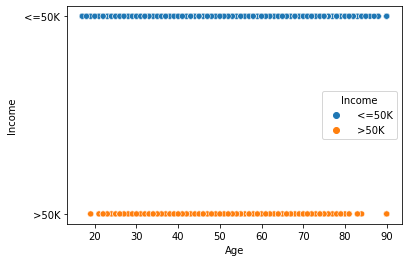

In [32]:
sns.scatterplot(x='Age',y='Income',hue='Income',data=data)

Age feature does not have much impact on target variable as shown above. All age range people gets below 50K and above 50K

<AxesSubplot:xlabel='Workclass', ylabel='count'>

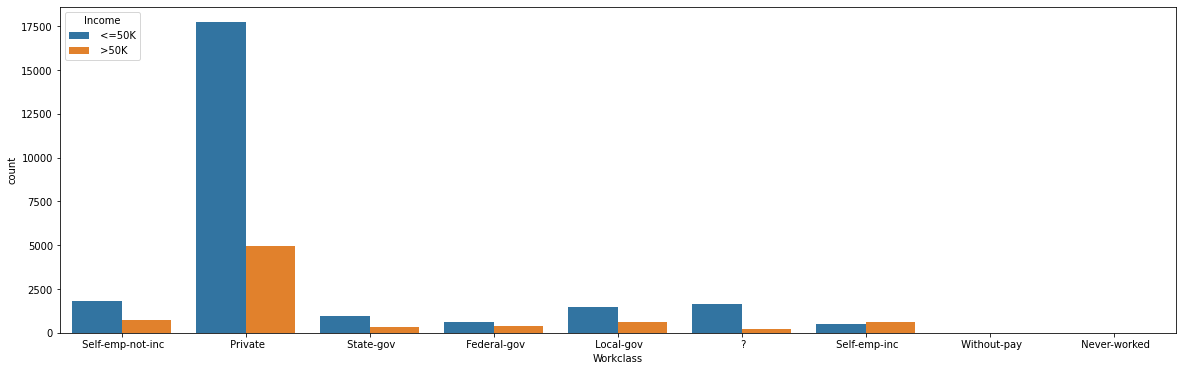

In [33]:
plt.figure(figsize=(20,6))
sns.countplot(x='Workclass',hue='Income',data=data)

<50K income group is low in all workclass in the given data set

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

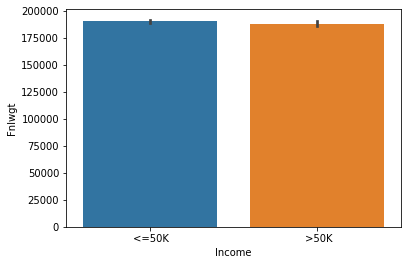

In [34]:
sns.barplot(x='Income',y='Fnlwgt',data=data)

<=50K income group has the highest fnlwgt

<AxesSubplot:xlabel='Education', ylabel='count'>

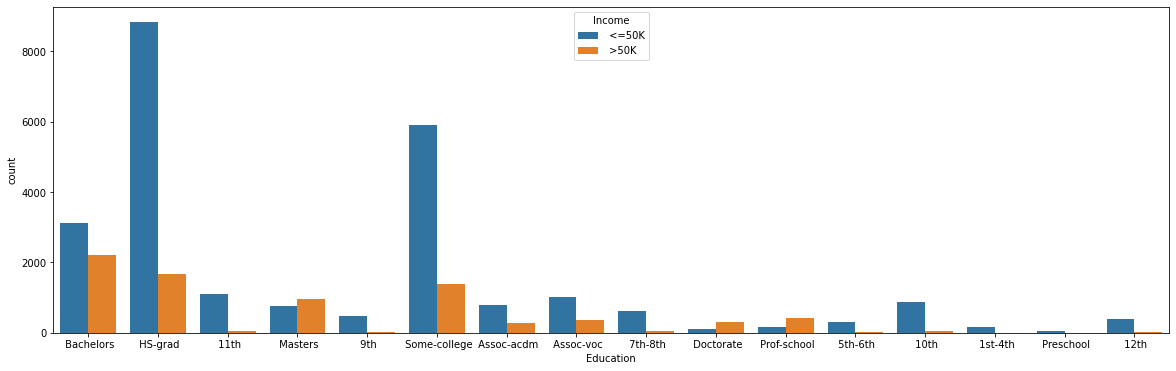

In [35]:
plt.figure(figsize=(20,6))
sns.countplot(x='Education',hue='Income',data=data)

<=50K income group is high in education "Masters", "Doctorate","Prof-School", majority fom other groups fals under income goup<=50K

Since the education number featuree is  encoded featur of education feataur, we will get the same observation there

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

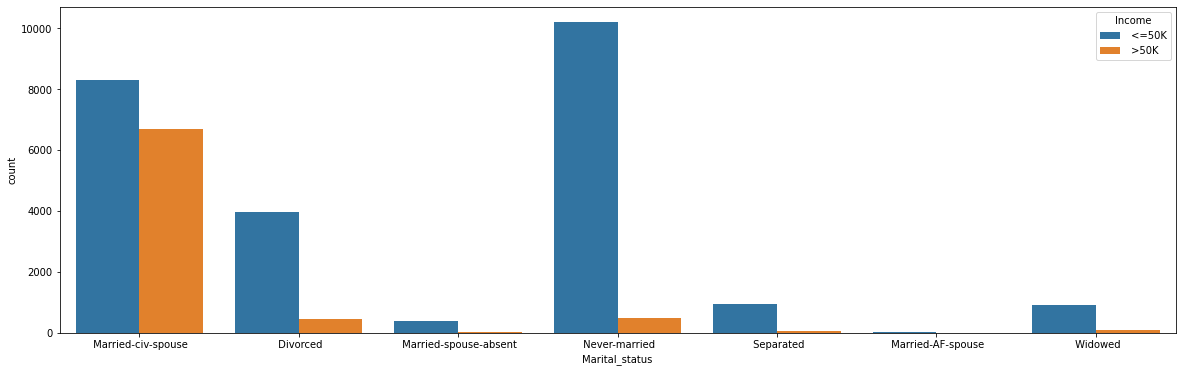

In [36]:
plt.figure(figsize=(20,6))
sns.countplot(x='Marital_status',hue='Income',data=data)

'>50K income gropu people are high in the category "Marries-civ-spouse"

<AxesSubplot:xlabel='Occupation', ylabel='count'>

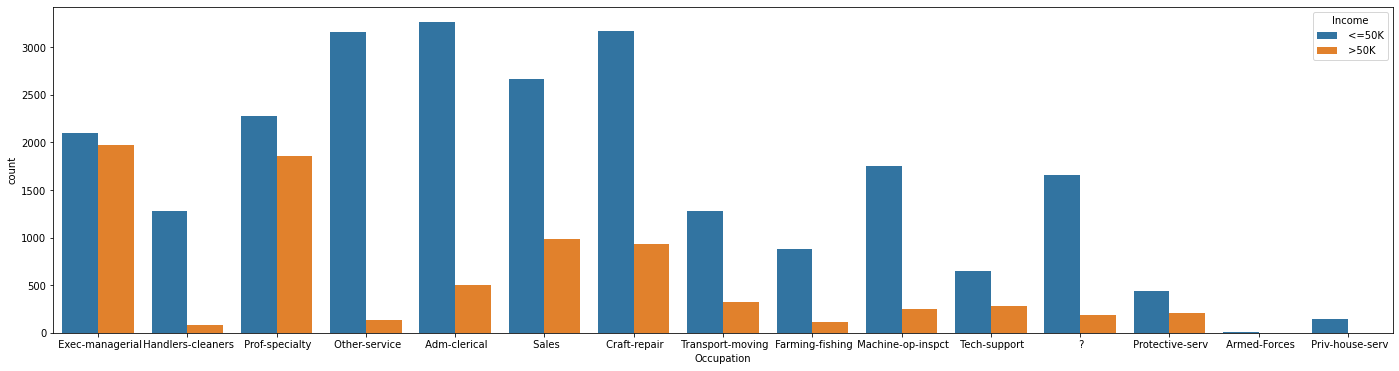

In [37]:
plt.figure(figsize=(24,6))
sns.countplot(x='Occupation',hue='Income',data=data)

'>50 income people are high in Occupation category "Exe_managerial and Prof-specility"

<AxesSubplot:xlabel='Relationship', ylabel='count'>

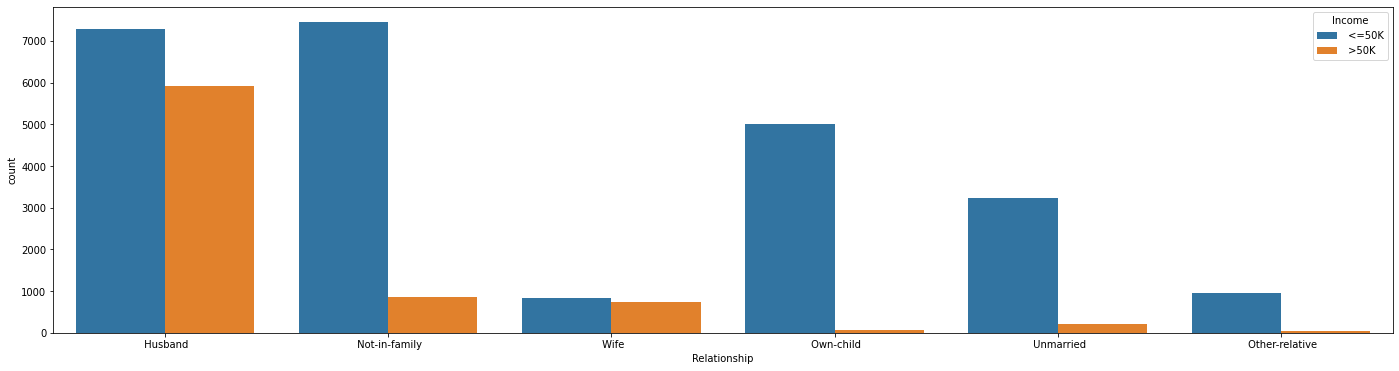

In [38]:
plt.figure(figsize=(24,6))
sns.countplot(x='Relationship',hue='Income',data=data)

'>50K people are high in relationship category and Husband

<AxesSubplot:xlabel='Race', ylabel='count'>

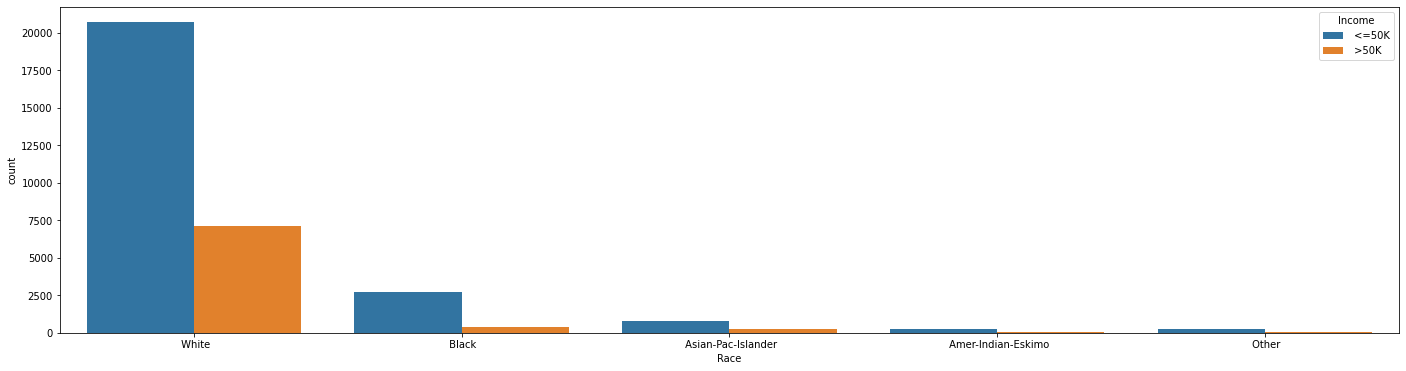

In [39]:
plt.figure(figsize=(24,6))
sns.countplot(x='Race',hue='Income',data=data)

''>50K and <=50K income people are high in Race category White

<AxesSubplot:xlabel='Sex', ylabel='count'>

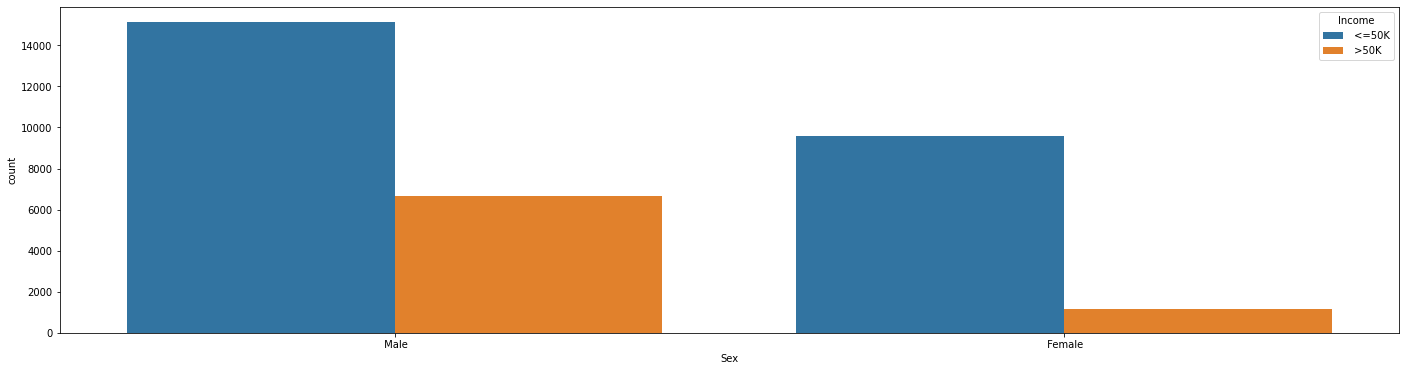

In [40]:
plt.figure(figsize=(24,6))
sns.countplot(x='Sex',hue='Income',data=data)

<=50K and >50K income group people are high in sex category as Male

<AxesSubplot:xlabel='Capital_gain', ylabel='Income'>

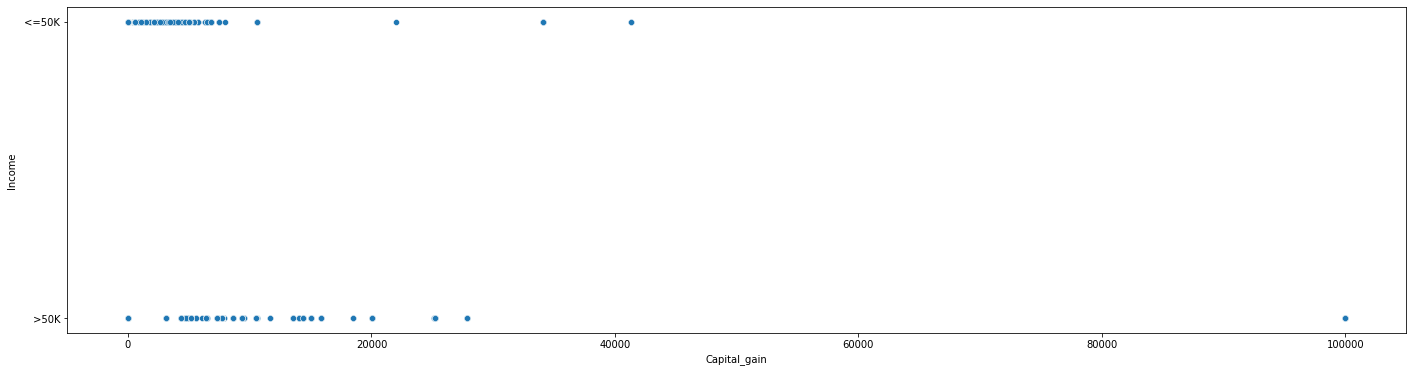

In [41]:
plt.figure(figsize=(24,6))
sns.scatterplot(x='Capital_gain',y='Income',data=data)

In [42]:
#less_income=['<=50']
#data[data['Income'].isin(less_income)]

majority of data falls under captila_gain as 0 - 15024. outliers will be treated with the IQR technique wuth the capping of 1 and 99.

<AxesSubplot:xlabel='Capital_loss', ylabel='Income'>

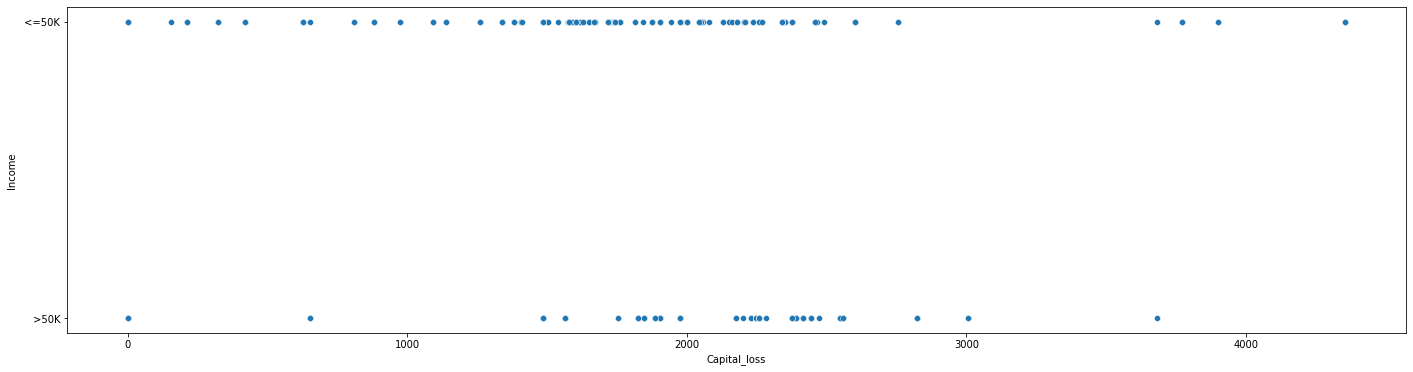

In [43]:
plt.figure(figsize=(24,6))
sns.scatterplot(x='Capital_loss',y='Income',data=data)

In [44]:
data.Capital_loss.quantile(.96)

1590.0

maximum of data falls between the captial loss range of 1000 to 3000 and the maximum is 4356. outliers will be treated with the IQR technique wuth the capping of 4 and 96.

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

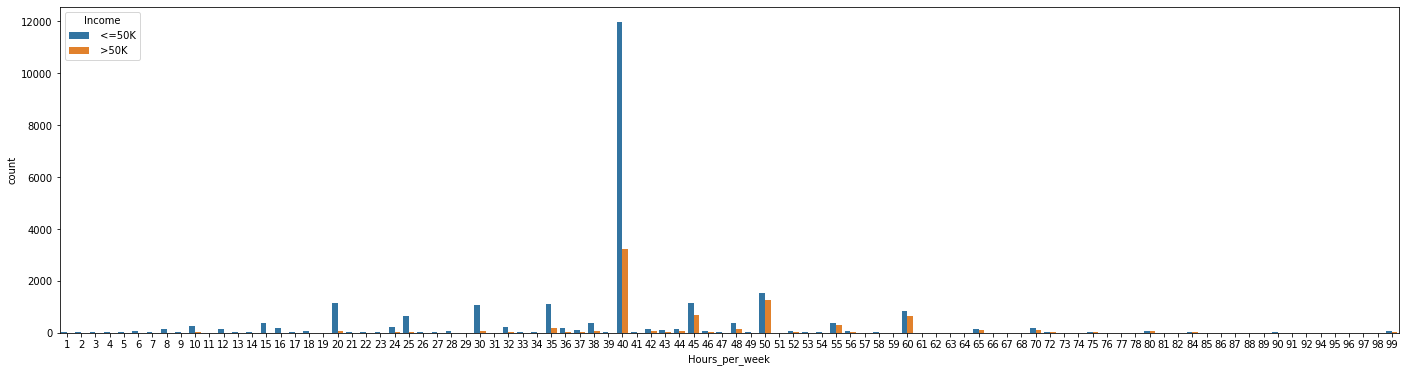

In [45]:
plt.figure(figsize=(24,6))
sns.countplot(x='Hours_per_week',hue='Income',data=data)

majority of hours per week is 40 and the income groups <=50K and >50K are high in the working hours 40 group

<AxesSubplot:xlabel='Native_country', ylabel='count'>

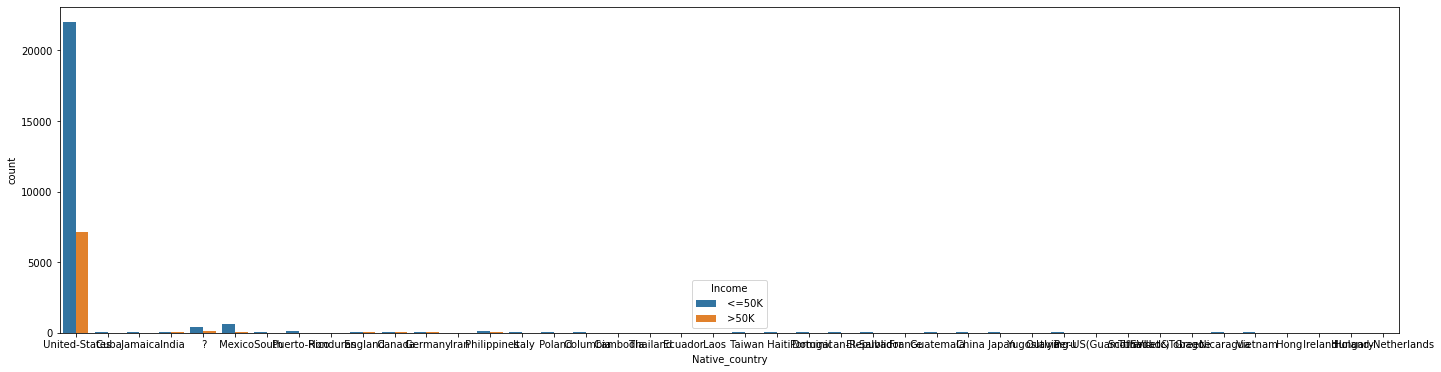

In [46]:
plt.figure(figsize=(24,6))
sns.countplot(x='Native_country',hue='Income',data=data)

<=50K and >50K peope are high in Native_country category united states

# MULTIVARIATE ANALYSIS

<AxesSubplot:>

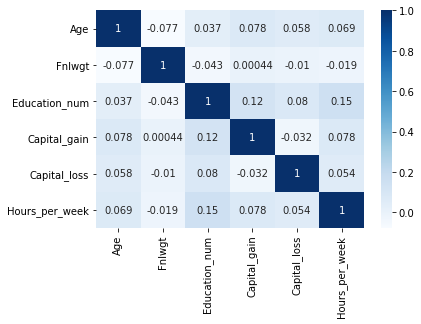

In [47]:
sns.heatmap(data.corr(),annot=True,cmap='Blues')

no numerical feature are in good correlation between other features

# FEATURE ENGINEEING

# Missing values Handling

In [48]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There are some features which has null values marked as '?'. we will make them as NAN before fixing them

In [49]:
columns=data.columns

In [50]:
for i in columns:
    data[i]=data[i].replace(' ?',np.NaN)

In [51]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

Since the missing values are in categorical fetures lets fix them with the mode of eaach feature

In [52]:
Mode_work_class=data['Workclass'].mode()[0]
Mode_Occupation=data['Occupation'].mode()[0]
Mode_Native=data['Native_country'].mode()[0]

In [53]:
data['Workclass']=data['Workclass'].replace(np.NaN,Mode_work_class)
data['Occupation']=data['Occupation'].replace(np.NaN,Mode_Occupation)
data['Native_country']=data['Native_country'].replace(np.NaN,Mode_Native)

In [54]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

now the missing values are fixed with the mode replacement technique

OUTLIER HANDLING

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

<Figure size 1080x432 with 0 Axes>

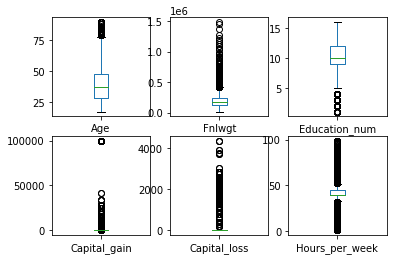

In [55]:
plt.figure(figsize=(15,6))
data.plot(kind='box',subplots=True,layout=(2,3))

lets try with Zscore and see the data loss

In [56]:
df=data.copy()

In [57]:
from scipy.stats import zscore

In [58]:
outliers_feature=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [59]:
zscore_feature=[]
for i in outliers_feature:
    col=i+'Zscore'
    df[col]=(df[i]-df[i].mean())/df[i].std()
    zscore_feature.append(col)

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,...,Capital_loss,Hours_per_week,Native_country,Income,AgeZscore,FnlwgtZscore,Education_numZscore,Capital_gainZscore,Capital_lossZscore,Hours_per_weekZscore
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,<=50K,0.837084,-1.008726,1.134761,-0.145911,-0.21666,-2.222086
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,<=50K,-0.042640,0.245043,-0.420020,-0.145911,-0.21666,-0.035429
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,<=50K,1.057015,0.425763,-1.197411,-0.145911,-0.21666,-0.035429
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,<=50K,-0.775743,1.408124,1.134761,-0.145911,-0.21666,-0.035429
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0,40,United-States,<=50K,-0.115950,0.898156,1.523457,-0.145911,-0.21666,-0.035429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,...,0,38,United-States,<=50K,-0.849053,0.639700,0.746066,-0.145911,-0.21666,-0.197404
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,...,0,40,United-States,>50K,0.103981,-0.335461,-0.420020,-0.145911,-0.21666,-0.035429
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,...,0,40,United-States,<=50K,1.423567,-0.358805,-0.420020,-0.145911,-0.21666,-0.035429
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,...,0,20,United-States,<=50K,-1.215605,0.110926,-0.420020,-0.145911,-0.21666,-1.655175


since lot of data's Zscore falls below 3 , we will implement IQR technique with differnt cappings as we saw in EDA

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

<Figure size 1080x432 with 0 Axes>

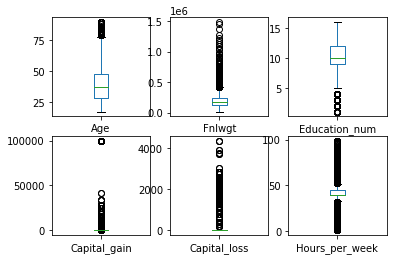

In [60]:
plt.figure(figsize=(15,6))
data.plot(kind='box',subplots=True,layout=(2,3))

In [61]:
data['Age'].quantile(.75)

48.0

In [62]:
def iqrfunction(feature):
    q1=data[feature].quantile(0.25)
    q3=data[feature].quantile(0.75)
    IQR=q3-q1
    print("Q1 is: ",q1)
    print("Q3 is :",q3)
    print("IQR is ",IQR)
    lower_limit=q1-(1.5*IQR)
    higher_limit=q3+(1.5*IQR)
    print("lower range is ",lower_limit)
    print("Higher rnge is ",higher_limit)
    data[feature]=np.where(data[feature]<lower_limit,lower_limit,data[feature])
    data[feature]=np.where(data[feature]>higher_limit,higher_limit,data[feature])
    data[feature].plot.box()

Q1 is:  28.0
Q3 is : 48.0
IQR is  20.0
lower range is  -2.0
Higher rnge is  78.0


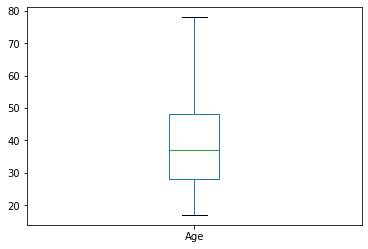

In [63]:
iqrfunction('Age')

Now the outliers in  Age featuree is fixed with the capping of 75 and 25 percentile

In [64]:
data['Fnlwgt'].quantile(.75)

237054.5

Q1 is:  117831.5
Q3 is : 237054.5
IQR is  119223.0
lower range is  -61003.0
Higher rnge is  415889.0


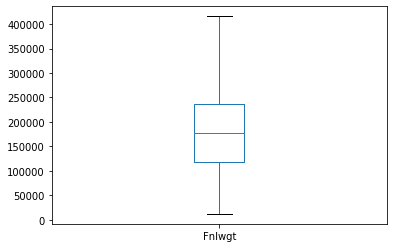

In [65]:
iqrfunction('Fnlwgt')

now the outlier in Fnlwgt featuree is fixed with capping 75 and 25

since education_num in a ecoded feature of education feaature, we are not fixing outliers in it

In [66]:
data['Capital_gain'].quantile(.75)

0.0

In [67]:
data['Capital_gain'].quantile(.80)

0.0

In [68]:
data['Capital_gain'].quantile(.90)

0.0

In [69]:
data['Capital_gain'].quantile(.95)

5013.0

since till 95th percentile having values and the rest from 75 till 95th percentile 0, we will use the capping of 95 and 5

In [70]:
def iqrfunction_95(feature):
    q1=data[feature].quantile(0.05)
    q3=data[feature].quantile(0.95)
    IQR=q3-q1
    print("Q1 is: ",q1)
    print("Q3 is :",q3)
    print("IQR is ",IQR)
    lower_limit=q1-(1.5*IQR)
    higher_limit=q3+(1.5*IQR)
    print("lower range is ",lower_limit)
    print("Higher rnge is ",higher_limit)
    data[feature]=np.where(data[feature]<lower_limit,lower_limit,data[feature])
    data[feature]=np.where(data[feature]>higher_limit,higher_limit,data[feature])
    data[feature].plot.box()

In [71]:
#iqrfunction_95('Capital_gain')

95th percentile is not fixing the outliers in feature Capital_gain, hence we gotta use 75 th percentile

Q1 is:  0.0
Q3 is : 0.0
IQR is  0.0
lower range is  0.0
Higher rnge is  0.0


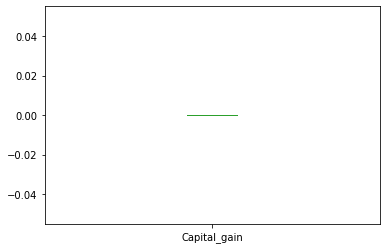

In [72]:
iqrfunction('Capital_gain')

now the outliers in capital_gain feature is fixed

Q1 is:  0.0
Q3 is : 0.0
IQR is  0.0
lower range is  0.0
Higher rnge is  0.0


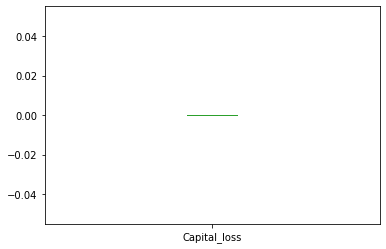

In [73]:
iqrfunction('Capital_loss')

now the outliers in capital_loss feature is fixed

Q1 is:  40.0
Q3 is : 45.0
IQR is  5.0
lower range is  32.5
Higher rnge is  52.5


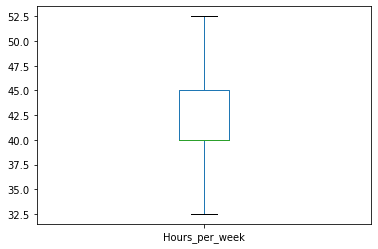

In [74]:
iqrfunction('Hours_per_week')

now the outliers in data set is fixed, lets try

Age                  AxesSubplot(0.125,0.536818;0.227941x0.343182)
Fnlwgt            AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Education_num     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Capital_gain            AxesSubplot(0.125,0.125;0.227941x0.343182)
Capital_loss         AxesSubplot(0.398529,0.125;0.227941x0.343182)
Hours_per_week       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

<Figure size 1080x432 with 0 Axes>

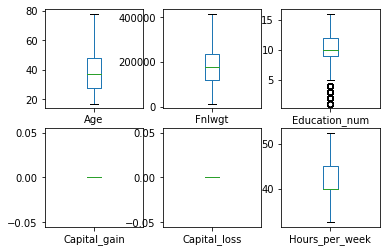

In [75]:
plt.figure(figsize=(15,6))
data.plot(kind='box',subplots=True,layout=(2,3))

now the outliers in all the features are fixed except Eduncation_num, as said above its a encoded feature of education feature.

lets remove education feature having said that its a duplicate of education_num feature

In [76]:
data=data.drop('Education',axis=1)

In [77]:
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50.0,Self-emp-not-inc,83311.0,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,32.5,United-States,<=50K
1,38.0,Private,215646.0,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
2,53.0,Private,234721.0,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
3,28.0,Private,338409.0,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
4,37.0,Private,284582.0,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K


# SKEWNESS HANDLING

In [78]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.513883,-0.358955
Fnlwgt,0.548285,-0.129457
Education_num,-0.311630,0.623525
Capital_gain,0.000000,0.000000
Capital_loss,0.000000,0.000000
Hours_per_week,0.438274,-0.661377


features age and Fnlwgt are skewed., lets fix them with transformation techniques

In [79]:
data['Age']=np.sqrt(data['Age'])
data['Age'].skew()

0.18083095166725846

In [80]:
data['Fnlwgt']=np.sqrt(data['Fnlwgt'])
data['Fnlwgt'].skew()

-0.13333102980906872

now the skewness in the numerical features are fixed

In [81]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.180831,-0.715781
Fnlwgt,-0.133331,-0.287265
Education_num,-0.311630,0.623525
Capital_gain,0.000000,0.000000
Capital_loss,0.000000,0.000000
Hours_per_week,0.438274,-0.661377


In [82]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education_num', 'Marital_status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital_gain',
       'Capital_loss', 'Hours_per_week', 'Native_country', 'Income'],
      dtype='object')

In [83]:
Categorical_feature=['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
df=data.copy()

In [86]:
encoder = LabelEncoder()

In [87]:
for i in Categorical_feature:
    df[i] = encoder.fit_transform(df[i])

In [88]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,7.071068,5,288.636450,13,2,3,0,4,1,0.0,0.0,32.5,38,0
1,6.164414,3,464.377002,9,0,5,1,4,1,0.0,0.0,40.0,38,0
2,7.280110,3,484.480134,7,2,5,0,2,1,0.0,0.0,40.0,38,0
3,5.291503,3,581.729318,13,2,9,5,2,0,0.0,0.0,40.0,4,0
4,6.082763,3,533.462276,14,2,3,5,4,0,0.0,0.0,40.0,38,0


now all the categorical features are encoded

# BALANCING DATASET

Before balancing dataset, lets split the dtaset into train and test with the basic ML model

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x=df.drop('Income',axis=1)
y=df['Income']

In [91]:
x.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,7.071068,5,288.636450,13,2,3,0,4,1,0.0,0.0,32.5,38
1,6.164414,3,464.377002,9,0,5,1,4,1,0.0,0.0,40.0,38
2,7.280110,3,484.480134,7,2,5,0,2,1,0.0,0.0,40.0,38
3,5.291503,3,581.729318,13,2,9,5,2,0,0.0,0.0,40.0,4
4,6.082763,3,533.462276,14,2,3,5,4,0,0.0,0.0,40.0,38


In [92]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Income, dtype: int32

In [93]:
y.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

# <=50K is 0
#>50K is 1

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [95]:
best_acc=0
best_random=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    lr_pred=LR.predict(x_test)
    accuracy=accuracy_score(y_test, lr_pred)
    if accuracy>best_acc:
        best_acc=accuracy
        best_random=i

print("Best Accuracy score is : ",best_acc,' and Random_state is : ',i)

Best Accuracy score is :  0.8035933660933661  and Random_state is :  99


Best Random state is 99 with te accuracy of 80%...... lets fix the imbalance in taget variable with over sampling technique SMOTE

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
x_train_os,y_train_os=SMOTE(random_state=99).fit_resample(x_train, y_train)

In [98]:
y_train_os.value_counts()

0    19793
1    19793
Name: Income, dtype: int64

In [99]:
y_train.value_counts()

0    19793
1     6255
Name: Income, dtype: int64

In [100]:
y_test.value_counts()

0    4926
1    1586
Name: Income, dtype: int64

now the imbalance is target variable is fixed, lets try with feww other models to find the best performing models

# LOGISTIC REGRESSION

In [101]:
LR=LogisticRegression()
LR.fit(x_train_os,y_train_os)
LR_PRED=LR.predict(x_test)
accuracy=accuracy_score(y_test,LR_PRED)
print('Accuracy of Logistic Regression is :',accuracy)

Accuracy of Logistic Regression is : 0.691031941031941


In [102]:
print("Classification report for Logistic Regression is : \n",classification_report(y_test,LR_PRED))
print("confusion report for Logistic Regression is : \n", confusion_matrix(y_test,LR_PRED))

Classification report for Logistic Regression is : 
               precision    recall  f1-score   support

           0       0.90      0.67      0.77      4926
           1       0.42      0.76      0.55      1586

    accuracy                           0.69      6512
   macro avg       0.66      0.71      0.66      6512
weighted avg       0.78      0.69      0.71      6512

confusion report for Logistic Regression is : 
 [[3294 1632]
 [ 380 1206]]


# DecisionTreeClassifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train_os,y_train_os)
DTC_PRED=DTC.predict(x_test)
accuracy=accuracy_score(y_test,DTC_PRED)
print('Accuracy of DecisionTreeClassifier is :',accuracy)
print("Classification report for DecisionTreeClassifier is : \n",classification_report(y_test,DTC_PRED))
print("confusion report for DecisionTreeClassifier is : \n", confusion_matrix(y_test,DTC_PRED))

Accuracy of DecisionTreeClassifier is : 0.7691953316953317
Classification report for DecisionTreeClassifier is : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      4926
           1       0.52      0.59      0.56      1586

    accuracy                           0.77      6512
   macro avg       0.69      0.71      0.70      6512
weighted avg       0.78      0.77      0.77      6512

confusion report for DecisionTreeClassifier is : 
 [[4066  860]
 [ 643  943]]


Accuracy of Decision tree classifier is 76%. Let try with some ensembling techniques

# ADABOOST CLASSIFIER

In [105]:
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier

In [106]:
ADA=AdaBoostClassifier()
ADA.fit(x_train_os,y_train_os)
ADA_PRED=ADA.predict(x_test)
accuracy=accuracy_score(y_test,ADA_PRED)
print('Accuracy of AdaBoostClassifier is :',accuracy)
print("Classification report for AdaBoostClassifier is : \n",classification_report(y_test,ADA_PRED))
print("confusion report for AdaBoostClassifier is : \n", confusion_matrix(y_test,ADA_PRED))

Accuracy of AdaBoostClassifier is : 0.792536855036855
Classification report for AdaBoostClassifier is : 
               precision    recall  f1-score   support

           0       0.92      0.79      0.85      4926
           1       0.55      0.80      0.65      1586

    accuracy                           0.79      6512
   macro avg       0.74      0.79      0.75      6512
weighted avg       0.83      0.79      0.80      6512

confusion report for AdaBoostClassifier is : 
 [[3899 1027]
 [ 324 1262]]


Accuracy of Ada Boost classifier is 79%

# RANDOM FOREST CLASSIFIER

In [107]:
RFC=RandomForestClassifier()
RFC.fit(x_train_os,y_train_os)
RFC_PRED=RFC.predict(x_test)
accuracy=accuracy_score(y_test,RFC_PRED)
print('Accuracy of RFC is :',accuracy)
print("Classification report for RFC is : \n",classification_report(y_test,RFC_PRED))
print("confusion report for RFC is : \n", confusion_matrix(y_test,RFC_PRED))

Accuracy of RFC is : 0.8137285012285013
Classification report for RFC is : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87      4926
           1       0.60      0.68      0.64      1586

    accuracy                           0.81      6512
   macro avg       0.75      0.77      0.76      6512
weighted avg       0.82      0.81      0.82      6512

confusion report for RFC is : 
 [[4220  706]
 [ 507 1079]]


# XGBOOSTCLASSIFER

In [108]:
import xgboost as xgb

In [109]:
XGB=xgb.XGBClassifier()
XGB.fit(x_train_os,y_train_os)
XGB_PRED=XGB.predict(x_test)
accuracy=accuracy_score(y_test,RFC_PRED)
print('Accuracy of XGB is :',accuracy)
print("Classification report for XGB is : \n",classification_report(y_test,XGB_PRED))
print("confusion report for XGB is : \n", confusion_matrix(y_test,XGB_PRED))

[04:14:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of XGB is : 0.8137285012285013
Classification report for XGB is : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      4926
           1       0.63      0.65      0.64      1586

    accuracy                           0.82      6512
   macro avg       0.76      0.76      0.76      6512
weighted avg       0.82      0.82      0.82      6512

confusion report for XGB is : 
 [[4321  605]
 [ 562 1024]]


Accuracy of XGBoost is 81.71%.,

In [110]:
import sklearn.svm as svm

In [111]:
clf = svm.SVC(decision_function_shape='ovo')

clf.fit(x_train_os,y_train_os.ravel())
svc_pred=clf.predict(x_test)


In [112]:

print("SVC accuracy is : ",accuracy_score(y_test,svc_pred))
print("SVC confusion matrix : \n",confusion_matrix(y_test,svc_pred))
print("SVC classification report is: \n",classification_report(y_test,svc_pred))

SVC accuracy is :  0.7240479115479116
SVC confusion matrix : 
 [[3578 1348]
 [ 449 1137]]
SVC classification report is: 
               precision    recall  f1-score   support

           0       0.89      0.73      0.80      4926
           1       0.46      0.72      0.56      1586

    accuracy                           0.72      6512
   macro avg       0.67      0.72      0.68      6512
weighted avg       0.78      0.72      0.74      6512



SVM accuracy is 72%

# CROSS VALIDATION

In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
print("Logistic regression cross validation accuracy is :", cross_val_score(LR,x,y,cv=5).mean())

Logistic regression cross validation accuracy is : 0.79017199017199


In [115]:
print("Decision cross validation accuracy is :", cross_val_score(DTC,x,y,cv=5).mean())

Decision cross validation accuracy is : 0.7749692874692875


In [116]:
print("ADA boost validation accuracy is :", cross_val_score(ADA,x,y,cv=5).mean())

ADA boost validation accuracy is : 0.8379914004914004


In [117]:
print("RFC cross validation accuracy is :", cross_val_score(RFC,x,y,cv=5).mean())

RFC cross validation accuracy is : 0.8280712530712531


In [118]:
print("XGB cross validation accuracy is :", cross_val_score(XGB,x,y,cv=5).mean())

[04:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:16:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [119]:
print("SVC cross validation accuracy is :", cross_val_score(clf,x,y,cv=5).mean())

SVC cross validation accuracy is : 0.7591830466830467


Model	Model Score	Corss validation score	Diff                                   
LR	       78.9	           68.5         	10.4                            
DTC	       77.61	       76.38	        1.23                          
ADA	       83.64	       79.49	        4.15                       
RFC     	82.89	       81.75	        1.14                         
XGB	        83.55	       81.71	        1.84                        
SVC	        75.91	       72.35	        3.56                                   


# Hence the best performing model is Random forest classifier

# Lets perform hyper parameter tunning using grid search CV

In [120]:
from sklearn.model_selection import GridSearchCV

n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None

#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
    'n_estimators':range(10,100),
    'criterion':['gini','entropy'],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'bootstrap':['True','False'] 

In [129]:
parmeters={
    'n_estimators':range(10,100),
    'criterion':['gini','entropy'],
    'max_features' : ['auto', 'sqrt'],
    'bootstrap':['True','False'] 
}

In [130]:
gsv=GridSearchCV(RFC,parmeters)
gsv.fit(x_train_os,y_train_os)
gsv

KeyboardInterrupt: 

In [ ]:
print(gsv.best_params_)

In [131]:
finalmodal=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='auto',bootstrap=True)

finalmodal.fit(x_train_os,y_train_os)
pred=finalmodal.predict(x_test)
print("Random forest classifier accuracy is : ",accuracy_score(y_test,pred))
print("Random forest Classifier confusion matrix : \n",confusion_matrix(y_test,pred))
print("Random forest classifier classification report is: \n",classification_report(y_test,pred))

Random forest classifier accuracy is :  0.8151105651105651
Random forest Classifier confusion matrix : 
 [[4218  708]
 [ 496 1090]]
Random forest classifier classification report is: 
               precision    recall  f1-score   support

           0       0.89      0.86      0.88      4926
           1       0.61      0.69      0.64      1586

    accuracy                           0.82      6512
   macro avg       0.75      0.77      0.76      6512
weighted avg       0.82      0.82      0.82      6512



In [ ]:
AUC,ROC curve

In [132]:
from sklearn.metrics import roc_curve , roc_auc_score

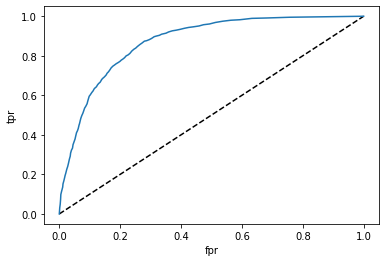

In [133]:
y_pred_prob=finalmodal.predict_proba(x_test)[:,1]
fpr,tpr,threshold =roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random forest Classifier')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()


In [134]:
import joblib

joblib.dump(finalmodal,'final_model.pkl')

['final_model.pkl']